In [34]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import tree
from sklearn.datasets import make_circles

In [35]:
dataset = pd.read_pickle(r'/Users/jinnan2/Desktop/uchi course/FInM/dataset.pkl')
dataset.columns.tolist()

['actq',
 'apq',
 'atq',
 'ceqq',
 'cheq',
 'cogsq',
 'csh12q',
 'cshfdq',
 'cshiq',
 'cshopq',
 'cshoq',
 'cshprq',
 'cstkq',
 'dlcq',
 'dlttq',
 'dpq',
 'dvpq',
 'epsf12',
 'epsfi12',
 'epsfiq',
 'epsfxq',
 'epspi12',
 'epspiq',
 'epspxq',
 'epsx12',
 'ibadj12',
 'ibadjq',
 'ibcomq',
 'ibq',
 'icaptq',
 'invtq',
 'lctq',
 'ltq',
 'mibq',
 'miiq',
 'niq',
 'nopiq',
 'oepf12',
 'oeps12',
 'oepsxq',
 'oiadpq',
 'oibdpq',
 'opepsq',
 'optdrq',
 'piq',
 'ppentq',
 'prcraq',
 'pstkq',
 'pstkrq',
 'rectq',
 'req',
 'revtq',
 'saleq',
 'seqq',
 'spiq',
 'teqq',
 'txdbq',
 'txditcq',
 'txpq',
 'txtq',
 'xintq',
 'xoprq',
 'xrdq',
 'xsgaq',
 'capxy',
 'cdvcy',
 'chechy',
 'cogsy',
 'dlcchy',
 'dltisy',
 'dltry',
 'dpcy',
 'dvy',
 'ibcomy',
 'ibcy',
 'miiy',
 'oancfy',
 'oepsxy',
 'oibdpy',
 'revty',
 'txpdy',
 'xidocy',
 'xidoy',
 'xinty',
 'xrdy',
 'xsgay',
 'dvpspq',
 'prccq',
 'beq',
 'bmq',
 'book_value_per_share',
 'book_value_yield',
 'market_cap',
 'buy_back_yield',
 'yearly_sales',
 'e

In [36]:
dataset.head()

actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   

                      cogsq     csh12q    cshfdq     cshiq  cshopq  ...  \
date       ticker                                                   ...   
2000-02-01 LLB        0.458     6.3910     6.391     6.989     0.0  ...   
2000-02-03 MYR       36.883    25.5360    22.082    28.458     0.0  ...   
2000-02-08 LZB      274.525    52.2660    52.274    52.544     0.0  ...   
           SJM       91.172    28.8808    28.603    32.425     0.0  ...   
2000-02-09 CSCO    1422.000  3374.1250  3648.000  3445.000     0.0  ...   

                   sector_code_815.0  sector_code_817.0  sector_code_822.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_823.0  sector_code_825.0  sector_code_830.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_835.0  sector_code_840.0  sector_code_845.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_850.0  
date       ticker                     
2000-02-01 LLB                     0  
2000-02-03 MYR                     0  
2000-02-08 LZB                     0  
           SJM                     0  
2000-02-09 CSCO                    0  

[5 rows x 731 columns]

# Question 1

In [37]:
data = dataset.copy()
data.fillna(0.0,inplace=True)

In [38]:
def cateFunc1(row):  
    if row['pred_rel_return'] > 0:
        return 1
    else:
        return -1

In [39]:
data['perform_vs_SPY'] = data.apply(lambda i: cateFunc1(i), axis=1)

In [40]:
print(data)

                       actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   
...                     ...      ...        ...        ...       ...   
2018-12-31 ELLO      77.786    1.907    255.123     90.949    61.530   
           MFCB      84.040   20.586    252.126    186.153    59.330   
           MFCB      79.628   16.437    242.757    193.929    56.640   
           PETZ      13.670    6.395     18.833      6.459     2.524   
           SGOC      15.429    0.088    156.187     98.344     5.608   

                      cogsq     csh12q    cshfdq     cshiq  csh

# Question 2

In [42]:
def cateFunc2(row):  
    if row['pred_rel_return'] > 0.05:
        return 2
    elif row['pred_rel_return'] > 0.01 and row['pred_rel_return'] < 0.05:
        return 1
    elif row['pred_rel_return'] > -0.01 and row['pred_rel_return'] < 0.01:
        return 0
    elif row['pred_rel_return'] > -0.05 and row['pred_rel_return'] < -0.01:
        return -1
    else:
        return -2

In [43]:
data['outperform_vs_SPY'] = data.apply(lambda i: cateFunc2(i), axis=1)

In [44]:
print(data)

                       actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   
...                     ...      ...        ...        ...       ...   
2018-12-31 ELLO      77.786    1.907    255.123     90.949    61.530   
           MFCB      84.040   20.586    252.126    186.153    59.330   
           MFCB      79.628   16.437    242.757    193.929    56.640   
           PETZ      13.670    6.395     18.833      6.459     2.524   
           SGOC      15.429    0.088    156.187     98.344     5.608   

                      cogsq     csh12q    cshfdq     cshiq  csh

# Question 3

In [93]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import cm
from collections import Counter
from sklearn import tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

sns.set()

In [94]:
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
target = norm.pdf((x - 0.75) / 1) + norm.pdf((y - 0.75) / 0.01) \
        + norm.pdf((x - 0.25) / 0.1) + norm.pdf((y - 0.25) / 1) \
        + np.array(np.round(np.random.normal(-0.1,0.1, n), 2))

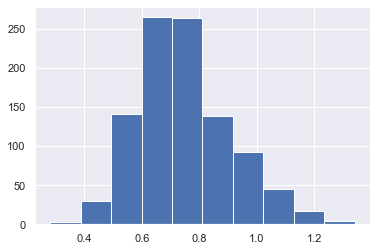

In [95]:
a = plt.hist(target,bins=10)[1]

In [96]:
a

array([0.28099537, 0.38692521, 0.49285505, 0.59878489, 0.70471473,
       0.81064457, 0.9165744 , 1.02250424, 1.12843408, 1.23436392,
       1.34029376])

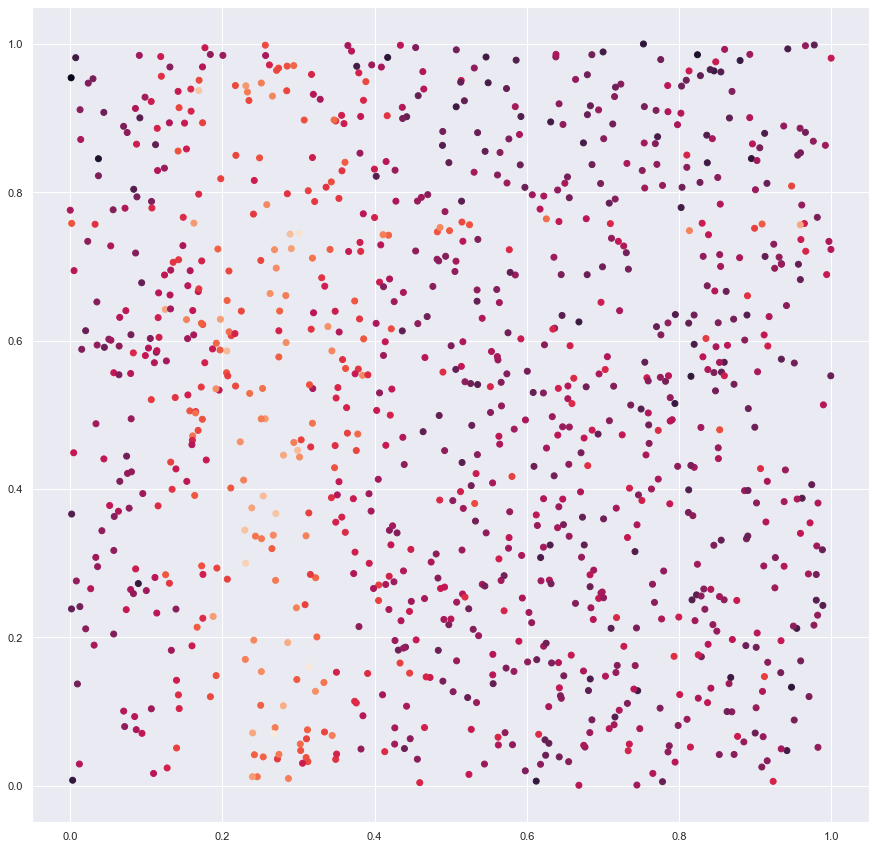

In [97]:
# Plot all points
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(x, y, c = target);

In [98]:
data1 = pd.DataFrame({'x' : x, 'y' : y})
tree_1 = DecisionTreeRegressor(max_depth=10,min_samples_leaf = 10,max_features=0.5)
tree_1.fit(data1,target)

DecisionTreeRegressor(max_depth=10, max_features=0.5, min_samples_leaf=10)

In [99]:
data1

,x,y
0,0.909684,0.127351
1,0.947929,0.808405
2,0.411787,0.580068
3,0.200836,0.984425
4,0.385746,0.602404
...,...,...
995,0.515037,0.435778
996,0.348281,0.458587
997,0.641684,0.166121
998,0.648234,0.352040


In [110]:
def boxes(tree,data,target):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
    
        left = children_left[i]
        right = children_right[i]
    
        return (left,right)  


    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue
    
    
    
    def box(i):
    
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);



    for i in range(1,n_nodes):
    
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 
            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        data_points_in_rect = []
        for i in range(len(data1)):
            p = data1.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                data_points_in_rect.append(target[i])
        color = cm.pink_r(np.mean(data_points_in_rect))
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (10,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

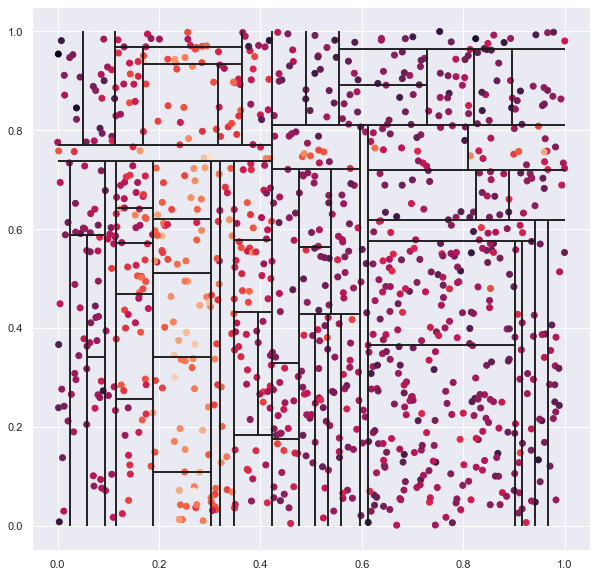

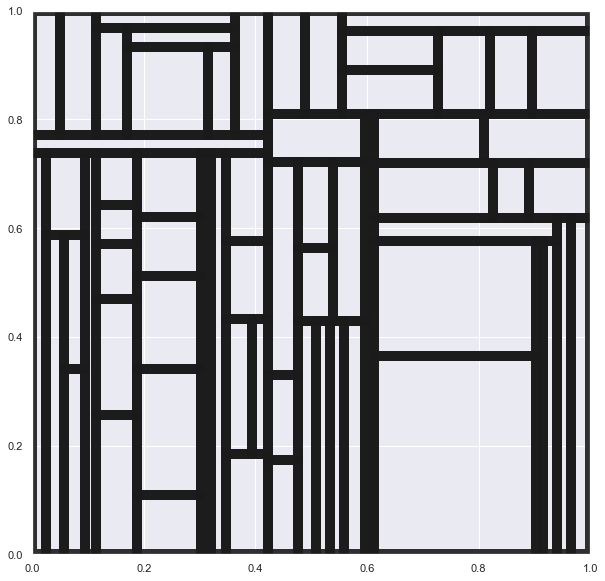

In [111]:
# gist_rainbow
boxes(tree_1,data1,target)